<a target="_blank" href="https://colab.research.google.com/drive/1U1FmzlvVX4Hmqylyl76icXD5UlZTNqgP#scrollTo=PcWGj6NgWqOI"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS155 Set 6

**Imports**

In [1]:
import os
import re
import random
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib import animation
from matplotlib.animation import FuncAnimation

## HMM CODE (TODO)

In [2]:
# import random

# class HiddenMarkovModel:
#     '''
#     Class implementation of Hidden Markov Models.
#     '''

#     def __init__(self, A, O):
#         '''
#         Initializes an HMM. Assumes the following:
#             - States and observations are integers starting from 0.
#             - There is a start state (see notes on A_start below). There
#               is no integer associated with the start state, only
#               probabilities in the vector A_start.
#             - There is no end state.
#         Arguments:
#             A:          Transition matrix with dimensions L x L.
#                         The (i, j)^th element is the probability of
#                         transitioning from state i to state j. Note that
#                         this does not include the starting probabilities.
#             O:          Observation matrix with dimensions L x D.
#                         The (i, j)^th element is the probability of
#                         emitting observation j given state i.
#         Parameters:
#             L:          Number of states.

#             D:          Number of observations.

#             A:          The transition matrix.

#             O:          The observation matrix.

#             A_start:    Starting transition probabilities. The i^th element
#                         is the probability of transitioning from the start
#                         state to state i. For simplicity, we assume that
#                         this distribution is uniform.
#         '''
#         A = np.array(A)
#         O = np.array(O)
#         self.L = A.shape[0]
#         self.D = O.shape[1]
#         self.A = A
#         self.O = O
#         self.A_start = np.repeat(1/self.L, self.L)


#     def viterbi(self, x):
#         '''
#         Uses the Viterbi algorithm to find the max probability state
#         sequence corresponding to a given input sequence.
#         Arguments:
#             x:          Input sequence in the form of a list of length M,
#                         consisting of integers ranging from 0 to D - 1.
#         Returns:
#             max_seq:    State sequence corresponding to x with the highest
#                         probability.
#         '''

#         M = len(x)      # Length of sequence.

#         probs = np.zeros((M+1, self.L))
#         seqs = [[[] for _ in range(self.L)] for _ in range(M + 1)]

#         seqs[1] = [[p] for p in range(self.L)]
#         probs[1] = [self.A_start[y] * self.O[y][x[0]] for y in range(self.L)]
#         for length in range(2, M+1):
#             for y_next in range(self.L):
#                 best_prev_seq = []
#                 best_joint_prob = float('-inf')
#                 for prev_seq, prev_joint_prob in zip(seqs[length-1], probs[length-1]):
#                     y_prev = prev_seq[-1]
#                     next_x = x[length-1]  # length = idx + 1
#                     if prev_joint_prob == 0 or self.A[y_prev][y_next] == 0 or self.O[y_next][next_x] == 0:
#                         continue
#                     joint_prob = np.log(prev_joint_prob) \
#                                 + np.log(self.A[y_prev][y_next]) \
#                                 + np.log(self.O[y_next][next_x])
#                     if joint_prob > best_joint_prob:
#                         best_joint_prob = joint_prob
#                         best_prev_seq = prev_seq
#                 seqs[length][y_next] = best_prev_seq + [y_next]
#                 probs[length][y_next] = np.exp(best_joint_prob)

#         max_seq = seqs[M][np.argmax(probs[M])]
#         return ''.join([str(yi) for yi in max_seq])


#     def forward(self, x, normalize=False):
#         '''
#         Uses the forward algorithm to calculate the alpha probability
#         vectors corresponding to a given input sequence.
#         Arguments:
#             x:          Input sequence in the form of a list of length M,
#                         consisting of integers ranging from 0 to D - 1.
#             normalize:  Whether to normalize each set of alpha_j(i) vectors
#                         at each i. This is useful to avoid underflow in
#                         unsupervised learning.
#         Returns:
#             alphas:     Vector of alphas.
#                         The (i, j)^th element of alphas is alpha_j(i),
#                         i.e. the probability of observing prefix x^1:i
#                         and state y^i = j.
#                         e.g. alphas[1][0] corresponds to the probability
#                         of observing x^1:1, i.e. the first observation,
#                         given that y^1 = 0, i.e. the first state is 0.
#         '''

#         M = len(x)      # Length of sequence.
#         alphas = np.zeros((M+1, self.L))    # alphas[0] will always be [0..0]
#         alphas[1] = [self.O[y][x[0]] / self.L for y in range(self.L)]

#         for j in range(1, M):
#             alpha_j = np.ndarray(shape=(self.L,))
#             for a in range(self.L):
#                 prob_sum = 0
#                 for y in range(self.L): # previous y
#                     prob_sum += alphas[j][y] * self.A[y][a]
#                 alpha_j[a] = prob_sum * self.O[a][x[j]]
#             if normalize:
#                 alpha_j /= np.sum(alpha_j)
#             alphas[j + 1] = alpha_j
#         return alphas


#     def backward(self, x, normalize=False):
#         '''
#         Uses the backward algorithm to calculate the beta probability
#         vectors corresponding to a given input sequence.
#         Arguments:
#             x:          Input sequence in the form of a list of length M,
#                         consisting of integers ranging from 0 to D - 1.
#             normalize:  Whether to normalize each set of beta_j(i) vectors
#                         at each i. This is useful to avoid underflow in
#                         unsupervised learning.
#         Returns:
#             betas:      Vector of betas.
#                         The (i, j)^th element of betas is beta_j(i), i.e.
#                         the probability of observing prefix x^(i+1):M and
#                         state y^i = j.
#                         e.g. betas[M][0] corresponds to the probability
#                         of observing x^M+1:M, i.e. no observations,
#                         given that y^M = 0, i.e. the last state is 0.
#         '''

#         M = len(x)      # Length of sequence.
#         betas = np.ones((M+1, self.L))

#         for postfix_start_pos in range(M-1, -1, -1):
#             beta_b = np.ndarray(shape=(self.L,))
#             for b in range(self.L):
#                 prob_sum = 0
#                 for next_state in range(self.L):
#                     seq_prob = betas[postfix_start_pos+1][next_state]
#                     transition_prob = self.A[b][next_state]
#                     emission_prob = self.O[next_state][x[postfix_start_pos]]
#                     prob_sum += seq_prob * transition_prob * emission_prob
#                 beta_b[b] = prob_sum
#             if normalize:
#                 beta_b /= np.sum(beta_b)
#             betas[postfix_start_pos] = beta_b
#         return betas


#     def supervised_learning(self, X, Y):
#         '''
#         Trains the HMM using the Maximum Likelihood closed form solutions
#         for the transition and observation matrices on a labeled
#         datset (X, Y). Note that this method does not return anything, but
#         instead updates the attributes of the HMM object.
#         Arguments:
#             X:          A dataset consisting of input sequences in the form
#                         of lists of variable length, consisting of integers
#                         ranging from 0 to D - 1. In other words, a list of
#                         lists.
#             Y:          A dataset consisting of state sequences in the form
#                         of lists of variable length, consisting of integers
#                         ranging from 0 to L - 1. In other words, a list of
#                         lists.
#                         Note that the elements in X line up with those in Y.
#         '''

#         # Calculate each element of A using the M-step formulas.
#         denoms = np.zeros(shape=(self.L,))
#         # Clear O and A matrices
#         self.O = np.zeros((self.L, self.D))
#         self.A = np.zeros((self.L, self.L))
#         for y in Y:
#             for state, next_state in zip(y[:-1], y[1:]):
#                 denoms[state] += 1
#                 self.A[state][next_state] += 1
#         for row, denom in zip(self.A, denoms):
#             row /= denom

#         # Calculate each element of O using the M-step formulas.
#         denoms = np.zeros(shape=(self.L,))
#         for x, y in zip(X, Y):
#             for obs, state in zip(x, y):
#                 denoms[state] += 1
#                 self.O[state][obs] += 1
#         for row, denom in zip(self.O, denoms):
#             row /= denom


#     def unsupervised_learning(self, X, N_iters):
#         '''
#         Trains the HMM using the Baum-Welch algorithm on an unlabeled
#         datset X. Note that this method does not return anything, but
#         instead updates the attributes of the HMM object.
#         Arguments:
#             X:          A dataset consisting of input sequences in the form
#                         of variable-length lists, consisting of integers
#                         ranging from 0 to D - 1. In other words, a list of
#                         lists.
#             N_iters:    The number of iterations to train on.
#         '''

#         # E step functions
#         def joint_prob_xj(alphas, betas, j):
#             '''
#             Helper function to calculate the joint probability P(y^j = a, x).
#             Returns a vector containing P(y=a_1, x) .. P(y=a_L, x).
#             j should range from [1, M]
#             '''
#             joint_probs = [0 for _ in range(self.L)]
#             prob_sum = 0
#             if j == 0:
#                 return joint_probs
#             for a in range(self.L):
#                 prob_sum += alphas[j][a] * betas[j][a]
#             for a in range(self.L):
#                 joint_probs[a] = (alphas[j][a] * betas[j][a]) / prob_sum
#             return joint_probs

#         def joint_transition_prob_xj(alphas, betas, j, x):
#             '''
#             Helper function to calculate P(y^{j}=a, y^j+1=b, x). Returns a 2D
#             vector, with the rows iterating over a, and the columns iterating
#             over b. j should range from [1, M-1].
#             '''
#             jt_probs = [[0 for _ in range(self.L)] for _ in range(self.L)]
#             if j == 0:
#                 return jt_probs
#             prob_sum = 0
#             for a in range(self.L):
#                 for b in range(self.L):
#                     prob_sum += alphas[j][a] * self.O[b][x[j]] * self.A[a][b] * betas[j+1][b]
#             for a in range(self.L):
#                 for b in range(self.L):
#                     jt_probs[a][b] =  alphas[j][a] * self.O[b][x[j]] * self.A[a][b] * betas[j+1][b] / prob_sum
#             return jt_probs

#         for n in range(N_iters):
#             print(f'epoch {n+1}/{N_iters}')
#             A_nums = [[0 for _ in range(self.L)] for _ in range(self.L)]
#             O_nums = [[0 for _ in range(self.D)] for _ in range(self.L)]
#             A_denoms = [0 for _ in range(self.L)]
#             O_denoms = [0 for _ in range(self.L)]
#             for x in X: # loop over training samples
#                 M = len(x)
#                 alphas = self.forward(x, normalize=True)
#                 betas = self.backward(x, normalize=True)
#                 for j in range(1, M+1): # loop over length of a single sample
#                     # Update A
#                     joint_probs = joint_prob_xj(alphas, betas, j-1)
#                     jt_probs = joint_transition_prob_xj(alphas, betas, j-1, x)
#                     for a in range(self.L):
#                         A_denoms[a] += joint_probs[a]
#                         for b in range(self.L):
#                             A_nums[a][b] += jt_probs[a][b]
#                     # Update O
#                     joint_probs = joint_prob_xj(alphas, betas, j)
#                     for a in range(self.L):
#                         O_denoms[a] += joint_probs[a]
#                         for obs in range(self.D):
#                             if obs == x[j-1]:
#                                 O_nums[a][obs] += joint_probs[a]
        
#             for a in range(self.L):
#                 for b in range(self.L):
#                     self.A[a][b] = A_nums[a][b] / A_denoms[a]
            
#             for a in range(self.L):
#                 for obs in range(self.D):
#                     self.O[a][obs] = O_nums[a][obs] / O_denoms[a]


#     def generate_emission(self, M, seed=None):
#         '''
#         Generates an emission of length M, assuming that the first state
#         is chosen uniformly at random.
#         Arguments:
#             M:          Length of the emission to generate.
#         Returns:
#             emission:   The randomly generated emission as a list.
#             states:     The randomly generated states as a list.
#         '''

#         # (Re-)Initialize random number generator
#         rng = np.random.default_rng(seed=seed)

#         emission = []
#         states = []
#         possible_states = [i for i in range(self.L)]
#         possible_emissions = [i for i in range(self.D)]
#         init_state = rng.choice(possible_states, p=self.A_start)
#         states.append(init_state)

#         for j in range(M):
#             prev_state = states[-1]
#             emit = rng.choice(possible_emissions, p=self.O[prev_state])
#             state = rng.choice(possible_states, p=self.A[prev_state])
#             emission.append(emit)
#             if j != M - 1:
#                 states.append(state)
#         return emission, states


#     def probability_alphas(self, x):
#         '''
#         Finds the maximum probability of a given input sequence using
#         the forward algorithm.
#         Arguments:
#             x:          Input sequence in the form of a list of length M,
#                         consisting of integers ranging from 0 to D - 1.
#         Returns:
#             prob:       Total probability that x can occur.
#         '''

#         # Calculate alpha vectors.
#         alphas = self.forward(x)

#         # alpha_j(M) gives the probability that the state sequence ends
#         # in j. Summing this value over all possible states j gives the
#         # total probability of x paired with any state sequence, i.e.
#         # the probability of x.
#         prob = sum(alphas[-1])
#         return prob


#     def probability_betas(self, x):
#         '''
#         Finds the maximum probability of a given input sequence using
#         the backward algorithm.
#         Arguments:
#             x:          Input sequence in the form of a list of length M,
#                         consisting of integers ranging from 0 to D - 1.
#         Returns:
#             prob:       Total probability that x can occur.
#         '''

#         betas = self.backward(x)

#         # beta_j(1) gives the probability that the state sequence starts
#         # with j. Summing this, multiplied by the starting transition
#         # probability and the observation probability, over all states
#         # gives the total probability of x paired with any state
#         # sequence, i.e. the probability of x.
#         prob = sum([betas[1][j] * self.A_start[j] * self.O[j][x[0]] \
#                     for j in range(self.L)])

#         return prob


# def supervised_HMM(X, Y):
#     '''
#     Helper function to train a supervised HMM. The function determines the
#     number of unique states and observations in the given data, initializes
#     the transition and observation matrices, creates the HMM, and then runs
#     the training function for supervised learning.
#     Arguments:
#         X:          A dataset consisting of input sequences in the form
#                     of lists of variable length, consisting of integers
#                     ranging from 0 to D - 1. In other words, a list of lists.
#         Y:          A dataset consisting of state sequences in the form
#                     of lists of variable length, consisting of integers
#                     ranging from 0 to L - 1. In other words, a list of lists.
#                     Note that the elements in X line up with those in Y.
#     '''
#     # Make a set of observations.
#     observations = set()
#     for x in X:
#         observations |= set(x)

#     # Make a set of states.
#     states = set()
#     for y in Y:
#         states |= set(y)

#     # Compute L and D.
#     L = len(states)
#     D = len(observations)

#     # Randomly initialize and normalize matrix A.
#     A = [[random.random() for i in range(L)] for j in range(L)]

#     for i in range(len(A)):
#         norm = sum(A[i])
#         for j in range(len(A[i])):
#             A[i][j] /= norm

#     # Randomly initialize and normalize matrix O.
#     O = [[random.random() for i in range(D)] for j in range(L)]

#     for i in range(len(O)):
#         norm = sum(O[i])
#         for j in range(len(O[i])):
#             O[i][j] /= norm

#     # Train an HMM with labeled data.
#     HMM = HiddenMarkovModel(A, O)
#     HMM.supervised_learning(X, Y)

#     return HMM

# def unsupervised_HMM(X, n_states, N_iters, seed=None):
#     '''
#     Helper function to train an unsupervised HMM. The function determines the
#     number of unique observations in the given data, initializes
#     the transition and observation matrices, creates the HMM, and then runs
#     the training function for unsupervised learing.
#     Arguments:
#         X:          A dataset consisting of input sequences in the form
#                     of lists of variable length, consisting of integers
#                     ranging from 0 to D - 1. In other words, a list of lists.
#         n_states:   Number of hidden states to use in training.

#         N_iters:    The number of iterations to train on.
#     '''
#     # Initialize random number generator
#     rng = np.random.default_rng(seed=seed)

#     # Make a set of observations.
#     observations = set()
#     for x in X:
#         observations |= set(x)

#     # Compute L and D.
#     L = n_states
#     D = len(observations)

#     # Randomly initialize and normalize matrix A.
#     A = [[rng.random() for i in range(L)] for j in range(L)]

#     for i in range(len(A)):
#         norm = sum(A[i])
#         for j in range(len(A[i])):
#             A[i][j] /= norm

#     # Randomly initialize and normalize matrix O.
#     O = [[rng.random() for i in range(D)] for j in range(L)]

#     for i in range(len(O)):
#         norm = sum(O[i])
#         for j in range(len(O[i])):
#             O[i][j] /= norm

#     # Train an HMM with unlabeled data.
#     HMM = HiddenMarkovModel(A, O)
#     HMM.unsupervised_learning(X, N_iters)

#     return HMM

**HMM helper code. No need to modify anything here.**

In [3]:
########################################
# CS/CNS/EE 155 2018
# Problem Set 6
#
# Author:       Andrew Kang
# Description:  Set 6 HMM helper
########################################



####################
# WORDCLOUD FUNCTIONS
####################

def mask():
    # Parameters.
    r = 128
    d = 2 * r + 1

    # Get points in a circle.
    y, x = np.ogrid[-r:d-r, -r:d-r]
    circle = (x**2 + y**2 <= r**2)

    # Create mask.
    mask = 255 * np.ones((d, d), dtype=np.uint8)
    mask[circle] = 0

    return mask

def text_to_wordcloud(text, max_words=50, title='', show=True):
    plt.close('all')

    # Generate a wordcloud image.
    wordcloud = WordCloud(random_state=0,
                          max_words=max_words,
                          background_color='white',
                          mask=mask()).generate(text)

    # Show the image.
    if show:
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(title, fontsize=24)
        plt.show()

    return wordcloud

def states_to_wordclouds(hmm, obs_map, max_words=50, show=True):
    # Initialize.
    M = 100000
    n_states = len(hmm.A)
    obs_map_r = obs_map_reverser(obs_map)
    wordclouds = []

    # Generate a large emission.
    emission, states = hmm.generate_emission(M)

    # For each state, get a list of observations that have been emitted
    # from that state.
    obs_count = []
    for i in range(n_states):
        obs_lst = np.array(emission)[np.where(np.array(states) == i)[0]]
        obs_count.append(obs_lst)

    # For each state, convert it into a wordcloud.
    for i in range(n_states):
        obs_lst = obs_count[i]
        sentence = [obs_map_r[j] for j in obs_lst]
        sentence_str = ' '.join(sentence)

        wordclouds.append(text_to_wordcloud(sentence_str, max_words=max_words, title='State %d' % i, show=show))

    return wordclouds


####################
# HMM FUNCTIONS
####################

def parse_observations(text):
    # Convert text to dataset.
    lines = [line.split() for line in text.split('\n') if line.split()]

    obs_counter = 0
    obs = []
    obs_map = {}

    for line in lines:
        obs_elem = []

        for word in line:
            word = re.sub(r'[^\w]', '', word).lower()
            if word not in obs_map:
                # Add unique words to the observations map.
                obs_map[word] = obs_counter
                obs_counter += 1

            # Add the encoded word.
            obs_elem.append(obs_map[word])

        # Add the encoded sequence.
        obs.append(obs_elem)

    return obs, obs_map

def obs_map_reverser(obs_map):
    obs_map_r = {}

    for key in obs_map:
        obs_map_r[obs_map[key]] = key

    return obs_map_r

def sample_sentence(hmm, obs_map, n_words=100, seed=None):
    # Get reverse map.
    obs_map_r = obs_map_reverser(obs_map)

    # Sample and convert sentence.
    emission, states = hmm.generate_emission(n_words, seed=seed)
    sentence = [obs_map_r[i] for i in emission]

    return ' '.join(sentence).capitalize() + '...'


####################
# HMM VISUALIZATION FUNCTIONS
####################

def visualize_sparsities(hmm, O_max_cols=50, O_vmax=0.1):
    plt.close('all')
    plt.set_cmap('viridis')

    # Visualize sparsity of A.
    plt.imshow(hmm.A, vmax=1.0)
    plt.colorbar()
    plt.title('Sparsity of A matrix')
    plt.show()

    # Visualize parsity of O.
    plt.imshow(np.array(hmm.O)[:, :O_max_cols], vmax=O_vmax, aspect='auto')
    plt.colorbar()
    plt.title('Sparsity of O matrix')
    plt.show()


####################
# HMM ANIMATION FUNCTIONS
####################

def animate_emission(hmm, obs_map, M=8, height=12, width=12, delay=1, seed=None):
    # Parameters.
    lim = 1200
    text_x_offset = 40
    text_y_offset = 80
    x_offset = 580
    y_offset = 520
    R = 420
    r = 100
    arrow_size = 20
    arrow_p1 = 0.03
    arrow_p2 = 0.02
    arrow_p3 = 0.06

    # Initialize.
    n_states = len(hmm.A)
    obs_map_r = obs_map_reverser(obs_map)
    wordclouds = states_to_wordclouds(hmm, obs_map, max_words=20, show=False)

    # Initialize plot.
    fig, ax = plt.subplots()
    fig.set_figheight(height)
    fig.set_figwidth(width)
    ax.grid('off')
    plt.axis('off')
    ax.set_xlim([0, lim])
    ax.set_ylim([0, lim])

    # Plot each wordcloud.
    for i, wordcloud in enumerate(wordclouds):
        x = x_offset + int(R * np.cos(np.pi * 2 * i / n_states))
        y = y_offset + int(R * np.sin(np.pi * 2 * i / n_states))
        ax.imshow(wordcloud.to_array(), extent=(x - r, x + r, y - r, y + r), aspect='auto', zorder=-1)

    # Initialize text.
    text = ax.text(text_x_offset, lim - text_y_offset, '', fontsize=24)

    # Make the arrows.
    zorder_mult = n_states ** 2 * 100
    arrows = []
    for i in range(n_states):
        row = []
        for j in range(n_states):
            # Arrow coordinates.
            x_i = x_offset + R * np.cos(np.pi * 2 * i / n_states)
            y_i = y_offset + R * np.sin(np.pi * 2 * i / n_states)
            x_j = x_offset + R * np.cos(np.pi * 2 * j / n_states)
            y_j = y_offset + R * np.sin(np.pi * 2 * j / n_states)

            dx = x_j - x_i
            dy = y_j - y_i
            d = np.sqrt(dx**2 + dy**2)

            if i != j:
                arrow = ax.arrow(x_i + (r/d + arrow_p1) * dx + arrow_p2 * dy,
                                 y_i + (r/d + arrow_p1) * dy + arrow_p2 * dx,
                                 (1 - 2 * r/d - arrow_p3) * dx,
                                 (1 - 2 * r/d - arrow_p3) * dy,
                                 color=(1 - hmm.A[i][j], ) * 3,
                                 head_width=arrow_size, head_length=arrow_size,
                                 zorder=int(hmm.A[i][j] * zorder_mult))
            else:
                arrow = ax.arrow(x_i, y_i, 0, 0,
                                 color=(1 - hmm.A[i][j], ) * 3,
                                 head_width=arrow_size, head_length=arrow_size,
                                 zorder=int(hmm.A[i][j] * zorder_mult))

            row.append(arrow)
        arrows.append(row)

    emission, states = hmm.generate_emission(M, seed=seed)

    def animate(i):
        if i >= delay:
            i -= delay

            if i == 0:
                arrows[states[0]][states[0]].set_color('red')
            elif i == 1:
                arrows[states[0]][states[0]].set_color((1 - hmm.A[states[0]][states[0]], ) * 3)
                arrows[states[i - 1]][states[i]].set_color('red')
            else:
                arrows[states[i - 2]][states[i - 1]].set_color((1 - hmm.A[states[i - 2]][states[i - 1]], ) * 3)
                arrows[states[i - 1]][states[i]].set_color('red')

            # Set text.
            text.set_text(' '.join([obs_map_r[e] for e in emission][:i+1]).capitalize())

            return arrows + [text]

    # Animate!
    print('\nAnimating...')
    anim = FuncAnimation(fig, animate, frames=M+delay, interval=1000)

    return anim


**Additional helper code. No need to modify anything here**

In [4]:
class Utility:
    '''
    Utility for the problem files.
    '''

    def __init__():
        pass

    @staticmethod
    def load_sequence(n):
        '''
        Load the file 'sequence_data<n>.txt' for a given n.
        Arguments:
            n:          Sequence index.
        Returns:
            A:          The transition matrix.
            O:          The observation matrix.
            seqs:       Input sequences.
        '''
        A = []
        O = []
        seqs = []

        # For each file:
        with urllib.request.urlopen(f'https://caltech-cs155.s3.us-east-2.amazonaws.com/sets/set6/data/sequence_data{n}.txt') as f:
            # Read the parameters.
            L, D = [int(x) for x in f.readline().decode('utf-8').strip().split('\t')]

            # Read the transition matrix.
            for i in range(L):
                A.append([float(x) for x in f.readline().decode('utf-8').strip().split('\t')])

            # Read the observation matrix.
            for i in range(L):
                O.append([float(x) for x in f.readline().decode('utf-8').strip().split('\t')])

            # The rest of the file consists of sequences.
            while True:
                seq = f.readline().decode('utf-8').strip()
                if seq == '':
                    break
                seqs.append([int(x) for x in seq])

        return A, O, seqs

    @staticmethod
    def load_ron():
        '''
        Loads the file 'ron.txt'.
        Returns:
            moods:      Sequnces of states, i.e. a list of lists.
                        Each sequence represents half a year of data.
            mood_map:   A hash map that maps each state to an integer.
            genres:     Sequences of observations, i.e. a list of lists.
                        Each sequence represents half a year of data.
            genre_map:  A hash map that maps each observation to an integer.
        '''
        moods = []
        mood_map = {}
        genres = []
        genre_map = {}
        mood_counter = 0
        genre_counter = 0

        with urllib.request.urlopen("https://caltech-cs155.s3.us-east-2.amazonaws.com/sets/set6/data/ron.txt") as f:
            mood_seq = []
            genre_seq = []

            while True:
                line = f.readline().decode('utf-8').strip()

                if line == '' or line == '-':
                    # A half year has passed. Add the current sequence to
                    # the list of sequences.
                    moods.append(mood_seq)
                    genres.append(genre_seq)
                    # Start new sequences.
                    mood_seq = []
                    genre_seq = []

                if line == '':
                    break
                elif line == '-':
                    continue

                mood, genre = line.split()

                # Add new moods to the mood state hash map.
                if mood not in mood_map:
                    mood_map[mood] = mood_counter
                    mood_counter += 1

                mood_seq.append(mood_map[mood])

                # Add new genres to the genre observation hash map.
                if genre not in genre_map:
                    genre_map[genre] = genre_counter
                    genre_counter += 1

                # Convert the genre into an integer.
                genre_seq.append(genre_map[genre])

        return moods, mood_map, genres, genre_map

    @staticmethod
    def load_ron_hidden():
        '''
        Loads the file 'ron.txt' and hides the states.
        Returns:
            genres:     The observations.
            genre_map:  A hash map that maps each observation to an integer.
        '''
        moods, mood_map, genres, genre_map = Utility.load_ron()

        return genres, genre_map

# Problem 2

## Part A <br>
**No need to modify anything here. This should work if your HMM code is correct**

In [5]:
from hmm import *
def sequence_prediction(n):
    '''
    Runs sequence prediction on the five sequences at the end of the file
    'sequence_data<n>.txt' for a given n and prints the results.
    Arguments:
        n:          Sequence index.
    '''
    A, O, seqs = Utility.load_sequence(n)

    # Print file information.
    print("File #{}:".format(n))
    print("{:30}{:30}".format('Emission Sequence', 'Max Probability State Sequence'))
    print('#' * 70)

    # For each input sequence:
    for seq in seqs:
        # Initialize an HMM.
        HMM = HiddenMarkovModel(A, O)

        # Make predictions.
        x = ''.join([str(xi) for xi in seq])
        y = HMM.viterbi(seq)

        # Print the results.
        print(x, y)

    print('')

for n in range(6):
    sequence_prediction(n)

File #0:
Emission Sequence             Max Probability State Sequence
######################################################################
25421 [3, 1, 0, 3, 3]
01232367534 [2, 2, 2, 2, 2, 1, 0, 0, 3, 1, 0]
5452674261527433 [1, 0, 3, 1, 0, 0, 3, 1, 0, 3, 2, 2, 2, 2, 2, 2]
7226213164512267255 [1, 3, 1, 0, 3, 3, 1, 0, 0, 0, 0, 3, 3, 1, 0, 0, 3, 1, 0]
0247120602352051010255241 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 3]

File #1:
Emission Sequence             Max Probability State Sequence
######################################################################
77550 [2, 2, 2, 2, 2]
7224523677 [2, 2, 2, 2, 2, 2, 1, 0, 0, 0]
505767442426747 [2, 2, 2, 1, 0, 0, 0, 0, 3, 3, 1, 0, 0, 3, 1]
72134131645536112267 [1, 0, 3, 1, 0, 3, 1, 0, 0, 0, 0, 3, 1, 0, 3, 3, 3, 1, 0, 0]
4733667771450051060253041 [2, 2, 2, 1, 0, 0, 0, 0, 0, 3, 2, 2, 2, 2, 2, 3, 1, 0, 3, 2, 2, 2, 2, 2, 3]

File #2:
Emission Sequence             Max Probability State Sequence
######################

## Part Bi <br>
**No need to modify anything here. This should work if your HMM code is correct**

In [6]:
def sequence_probability(n):
    '''
    Determines the probability of emitting the five sequences at the end of
    the file 'sequence_data<n>.txt' for a given n and prints the results.
    Arguments:s
        n:          File index.
    '''
    A, O, seqs = Utility.load_sequence(n)

    # Print file information.
    print("File #{}:".format(n))
    print("{:30}{:10}".format('Emission Sequence', 'Probability of Emitting Sequence'))
    print('#' * 70)

    # For each input sequence:
    for seq in seqs:
        # Initialize an HMM.
        HMM = HiddenMarkovModel(A, O)

        # Compute the probability of the input sequence.
        x = ''.join([str(xi) for xi in seq])
        p = HMM.probability_alphas(seq)

        # Print the results.
        print("{:30}{:<10.3e}".format(x, p))

    print('')

for n in range(6):
    sequence_probability(n)

File #0:
Emission Sequence             Probability of Emitting Sequence
######################################################################
25421                         4.537e-05 
01232367534                   1.620e-11 
5452674261527433              4.348e-15 
7226213164512267255           4.739e-18 
0247120602352051010255241     9.365e-24 

File #1:
Emission Sequence             Probability of Emitting Sequence
######################################################################
77550                         1.181e-04 
7224523677                    2.033e-09 
505767442426747               2.477e-13 
72134131645536112267          8.871e-20 
4733667771450051060253041     3.740e-24 

File #2:
Emission Sequence             Probability of Emitting Sequence
######################################################################
60622                         2.088e-05 
4687981156                    5.181e-11 
815833657775062               3.315e-15 
21310222515963505015          5.126e

## Part Bii <br>
**No need to modify anything here. This should work if your HMM code is correct**

In [7]:
def sequence_probability(n):
    '''
    Determines the probability of emitting the five sequences at the end of
    the file 'sequence_data<n>.txt' for a given n and prints the results.
    Arguments:
        n:          File index.
    '''
    A, O, seqs = Utility.load_sequence(n)

    # Print file information.
    print("File #{}:".format(n))
    print("{:30}{:10}".format('Emission Sequence', 'Probability of Emitting Sequence'))
    print('#' * 70)

    # For each input sequence:
    for seq in seqs:
        # Initialize an HMM.
        HMM = HiddenMarkovModel(A, O)

        # Compute the probability of the input sequence.
        x = ''.join([str(xi) for xi in seq])
        p = HMM.probability_betas(seq)

        # Print the results.
        print("{:30}{:<10.3e}".format(x, p))

    print('')

for n in range(6):
    sequence_probability(n)

File #0:
Emission Sequence             Probability of Emitting Sequence
######################################################################
25421                         4.537e-05 
01232367534                   1.620e-11 
5452674261527433              4.348e-15 
7226213164512267255           4.739e-18 
0247120602352051010255241     9.365e-24 

File #1:
Emission Sequence             Probability of Emitting Sequence
######################################################################
77550                         1.181e-04 
7224523677                    2.033e-09 
505767442426747               2.477e-13 
72134131645536112267          8.871e-20 
4733667771450051060253041     3.740e-24 

File #2:
Emission Sequence             Probability of Emitting Sequence
######################################################################
60622                         2.088e-05 
4687981156                    5.181e-11 
815833657775062               3.315e-15 
21310222515963505015          5.126e

KeyboardInterrupt: 

## Part C <br>
**No need to modify anything here. This should work if your HMM code is correct**

In [ ]:
from hmm import *
def supervised_learning():
    '''
    Trains an HMM using supervised learning on the file 'ron.txt' and
    prints the results.
    '''
    moods, mood_map, genres, genre_map = Utility.load_ron()

    # Train the HMM.
    HMM = supervised_HMM(genres, moods)

    # Print the transition matrix.
    print("Transition Matrix:")
    print('#' * 70)
    for i in range(len(HMM.A)):
        print(''.join("{:<12.3e}".format(HMM.A[i][j]) for j in range(len(HMM.A[i]))))
        print(sum(HMM.A[i]))
    print('')
    print('')

    # Print the observation matrix.
    print("Observation Matrix:  ")
    print('#' * 70)
    for i in range(len(HMM.O)):
        print(''.join("{:<12.3e}".format(HMM.O[i][j]) for j in range(len(HMM.O[i]))))
        print(sum(HMM.O[i]))
    print('')

supervised_learning()

Transition Matrix:
######################################################################
2.833e-01   4.714e-01   1.310e-01   1.143e-01   
1.0
2.321e-01   3.810e-01   2.940e-01   9.284e-02   
1.0
1.040e-01   9.760e-02   3.696e-01   4.288e-01   
1.0
1.883e-01   9.903e-02   3.052e-01   4.075e-01   
1.0


Observation Matrix:  
######################################################################
1.486e-01   2.288e-01   1.533e-01   1.179e-01   4.717e-02   5.189e-02   2.830e-02   1.297e-01   9.198e-02   2.358e-03   
1.0
1.062e-01   9.653e-03   1.931e-02   3.089e-02   1.699e-01   4.633e-02   1.409e-01   2.394e-01   1.371e-01   1.004e-01   
1.0
1.194e-01   4.299e-02   6.529e-02   9.076e-02   1.768e-01   2.022e-01   4.618e-02   5.096e-02   7.803e-02   1.274e-01   
1.0
1.694e-01   3.871e-02   1.468e-01   1.823e-01   4.839e-02   6.290e-02   9.032e-02   2.581e-02   2.161e-01   1.935e-02   
0.9999999999999999



## Part D <br>
**No need to modify anything here. This should work if your HMM code is correct**

In [ ]:
def unsupervised_learning(n_states, N_iters, seed=None):
    '''
    Trains an HMM using supervised learning on the file 'ron.txt' and
    prints the results.
    Arguments:
        n_states:   Number of hidden states that the HMM should have.
        N_iters:    Number of EM steps taken.
        rng:        The random number generator used. Default to 1.
    '''
    genres, genre_map = Utility.load_ron_hidden()

    # Train the HMM.
    HMM = unsupervised_HMM(genres, n_states, N_iters, seed=seed)

    # Print the transition matrix.
    print("Transition Matrix:")
    print('#' * 70)
    for i in range(len(HMM.A)):
        print(''.join("{:<12.3e}".format(HMM.A[i][j]) for j in range(len(HMM.A[i]))))
    print('')
    print('')

    # Print the observation matrix.
    print("Observation Matrix:  ")
    print('#' * 70)
    for i in range(len(HMM.O)):
        print(''.join("{:<12.3e}".format(HMM.O[i][j]) for j in range(len(HMM.O[i]))))
    print('')

unsupervised_learning(4, 1000, seed=123)

epoch 1/1000
epoch 2/1000
epoch 3/1000
epoch 4/1000
epoch 5/1000
epoch 6/1000
epoch 7/1000
epoch 8/1000
epoch 9/1000
epoch 10/1000
epoch 11/1000
epoch 12/1000
epoch 13/1000
epoch 14/1000
epoch 15/1000
epoch 16/1000
epoch 17/1000
epoch 18/1000
epoch 19/1000
epoch 20/1000
epoch 21/1000
epoch 22/1000
epoch 23/1000
epoch 24/1000
epoch 25/1000
epoch 26/1000
epoch 27/1000
epoch 28/1000
epoch 29/1000
epoch 30/1000
epoch 31/1000
epoch 32/1000
epoch 33/1000
epoch 34/1000
epoch 35/1000
epoch 36/1000
epoch 37/1000
epoch 38/1000
epoch 39/1000
epoch 40/1000
epoch 41/1000
epoch 42/1000
epoch 43/1000
epoch 44/1000
epoch 45/1000
epoch 46/1000
epoch 47/1000
epoch 48/1000
epoch 49/1000
epoch 50/1000
epoch 51/1000
epoch 52/1000
epoch 53/1000
epoch 54/1000
epoch 55/1000
epoch 56/1000
epoch 57/1000
epoch 58/1000
epoch 59/1000
epoch 60/1000
epoch 61/1000
epoch 62/1000
epoch 63/1000
epoch 64/1000
epoch 65/1000
epoch 66/1000
epoch 67/1000
epoch 68/1000
epoch 69/1000
epoch 70/1000
epoch 71/1000
epoch 72/1000
e

## Part F <br>
**No need to modify anything here. This should work if your HMM code is correct**

In [ ]:
def sequence_generator(n, k, M, seed=None):
    '''
    Generates k emissions of length M using the HMM stored in the file
    'sequence_data<n>.txt' for a given n and prints the results.
    Arguments:
        N:          File index.
        K:          Number of sequences to generate.
        M:          Length of emission to generate.
    '''
    A, O, seqs = Utility.load_sequence(n)

    # Print file information.
    print("File #{}:".format(n))
    print("{:30}".format('Generated Emission'))
    print('#' * 70)

    # Initialize a random number generator from the seed
    # so that this will generate the same k sequences each call
    rng = np.random.default_rng(seed=seed)
    

    # Generate k input sequences.
    for i in range(k):
        # Initialize an HMM.
        HMM = HiddenMarkovModel(A, O)

        # Generate a single input sequence of length m.
        emission, states = HMM.generate_emission(M, seed=rng)
        x = ''.join([str(i) for i in emission])

        # Print the results.
        print("{:30}".format(x))

    print('')

for n in range(6):
    sequence_generator(n, 5, 20, seed=123)

File #0:
Generated Emission            
######################################################################


TypeError: HiddenMarkovModel.generate_emission() got an unexpected keyword argument 'seed'

## Visualization of the dataset <br>
**No need to modify anything here. This should work if your HMM code is correct** <br>
We will be using the Constitution as our dataset. First, we visualize the entirety of the Constitution as a wordcloud:



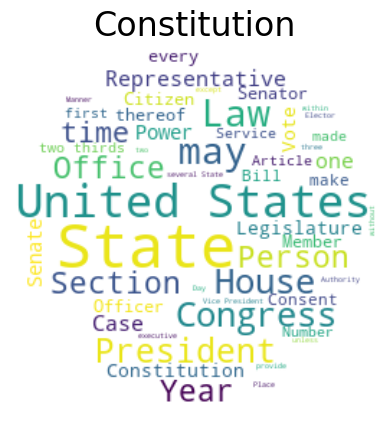

In [ ]:
text = urllib.request.urlopen('https://caltech-cs155.s3.us-east-2.amazonaws.com/sets/set6/data/constitution.txt').read().decode('utf-8')
wordcloud = text_to_wordcloud(text, title='Constitution')

## Training an HMM <br>
**No need to modify anything here. This should work if your HMM code is correct** <br>
Now we train an HMM on our dataset. We use 10 hidden states and train over 100 iterations:

In [ ]:
obs, obs_map = parse_observations(text)
hmm8 = unsupervised_HMM(obs, 10, 100)

epoch 1/100
epoch 2/100
epoch 3/100
epoch 4/100
epoch 5/100
epoch 6/100


KeyboardInterrupt: 

## Part G: Visualization of the sparsities of A and O <br>
**No need to modify anything here. This should work if your HMM code is correct** <br>
We can visualize the sparsities of the A and O matrices by treating the matrix entries as intensity values and showing them as images. What patterns do you notice?

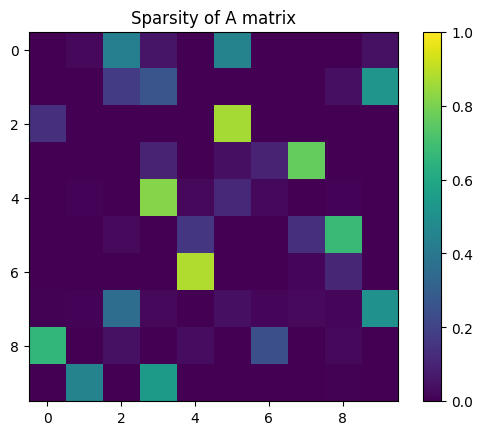

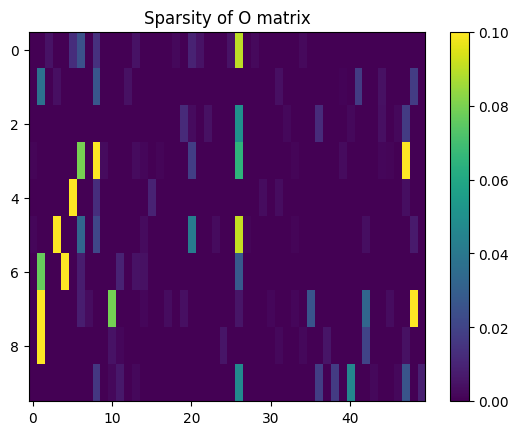

In [ ]:
visualize_sparsities(hmm8, O_max_cols=50)

## Generating a sample sentence <br>
As you have already seen, an HMM can be used to generate sample sequences based on the given dataset. Run the cell below to show a sample sentence based on the Constitution.

In [ ]:
print('Sample Sentence:\n====================')
print(sample_sentence(hmm8, obs_map, n_words=25))

Sample Sentence:
Treaties shall be such and originate proved shall adjourn congress shall such assembled of bankruptcies nays as president of three to cases on the second...


## Part H: Using varying numbers of hidden states <br>
**No need to modify anything here. This should work if your HMM code is correct** <br>
Using different numbers of hidden states can lead to different behaviours in the HMMs. Below, we train several HMMs with 1, 2, 4, and 16 hidden states, respectively. What do you notice about their emissions? How do these emissions compare to the emission above

In [ ]:
hmm1 = unsupervised_HMM(obs, 1, 100, seed=123)
print('\nSample Sentence:\n====================')
print(sample_sentence(hmm1, obs_map, n_words=25))


Sample Sentence:
Executive the the declare the congress under more next proceed may within or of it state shall shall year power or or this first under...


In [ ]:

hmm2 = unsupervised_HMM(obs, 2, 100, seed=123)
print('\nSample Sentence:\n====================')
print(sample_sentence(hmm2, obs_map, n_words=25))


Sample Sentence:
Acceptance the constitution the from concurrence service that to test state whatsoever in article electors and of pay needful age which divided before united chuse...


In [ ]:
hmm4 = unsupervised_HMM(obs, 4, 100, seed=123)
print('\nSample Sentence:\n====================')
print(sample_sentence(hmm4, obs_map, n_words=25))


Sample Sentence:
To proceed united president consent the seats vice and shall or granted a office of into be vacancies such oath as for them law respective...


In [ ]:
hmm16 = unsupervised_HMM(obs, 16, 100, seed=123)
print('\nSample Sentence:\n====================')
print(sample_sentence(hmm16, obs_map, n_words=25))


Sample Sentence:
He or try title and which he shall think ascertained execute member days the treasury numbers a term be in another constitution by on demand...


## Part I: Visualizing the wordcloud of each state <br>
**No need to modify anything here. This should work if your HMM code is correct** <br>
Below, we visualize each state as a wordcloud by sampling a large emission from the state:

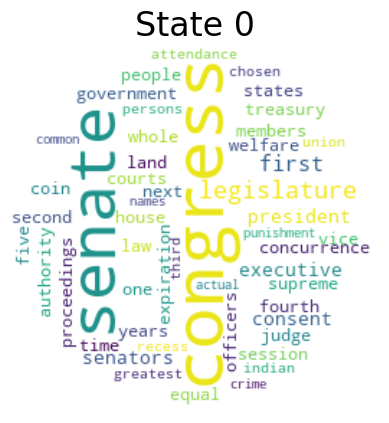

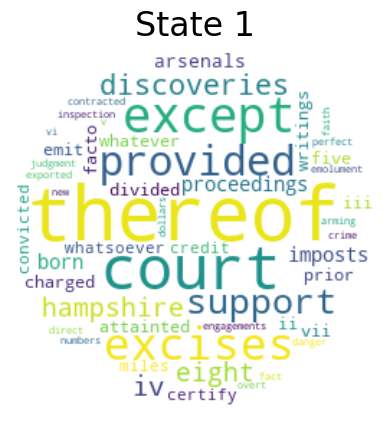

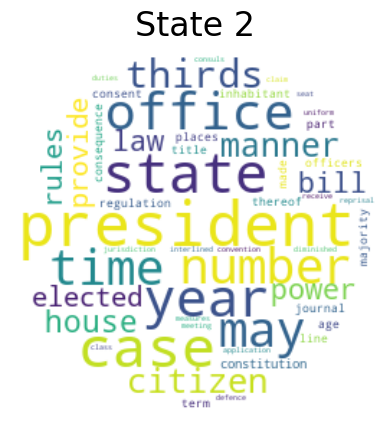

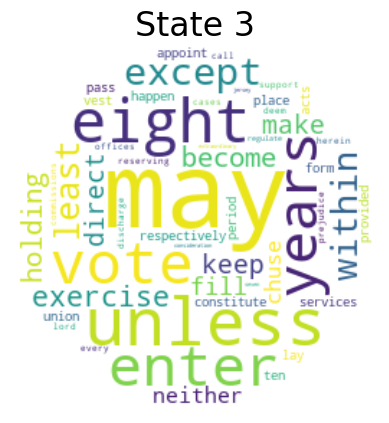

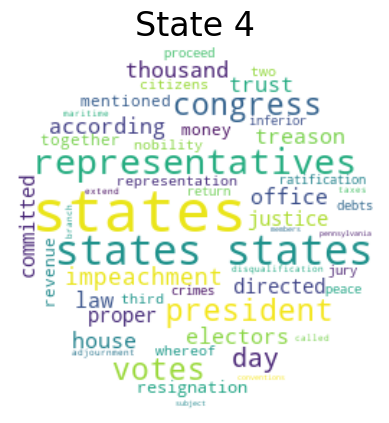

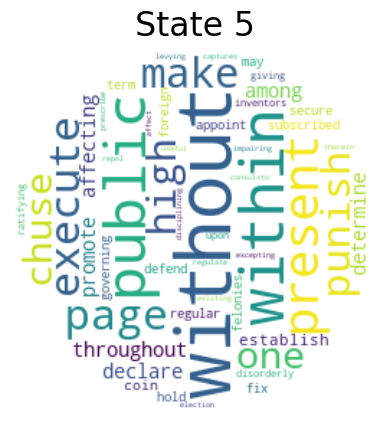

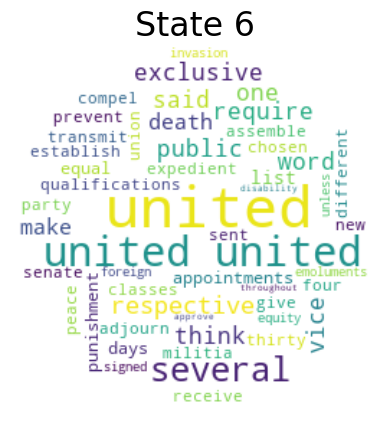

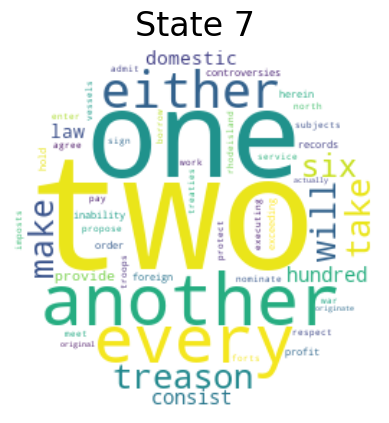

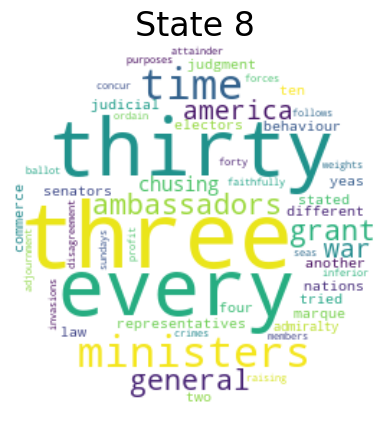

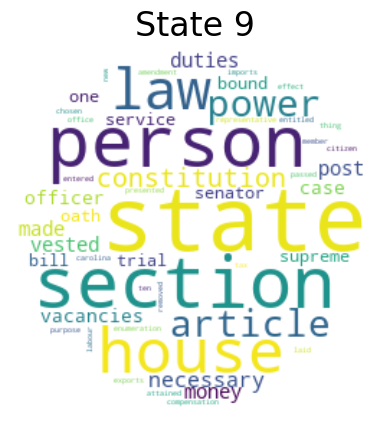

In [ ]:
wordclouds = states_to_wordclouds(hmm8, obs_map)

## Visualizing the process of an HMM generating an emission <br>
**No need to modify anything here. This should work if your HMM code is correct** <br>
The visualization below shows how an HMM generates an emission. Each state is shown as a wordcloud on the plot, and transition probabilities between the states are shown as arrows. The darker an arrow, the higher the transition probability.

At every frame, a transition is taken and an observation is emitted from the new state. A red arrow indicates that the transition was just taken. If a transition stays at the same state, it is represented as an arrowhead on top of that state.

Use fullscreen for a better view of the process.


Animating...


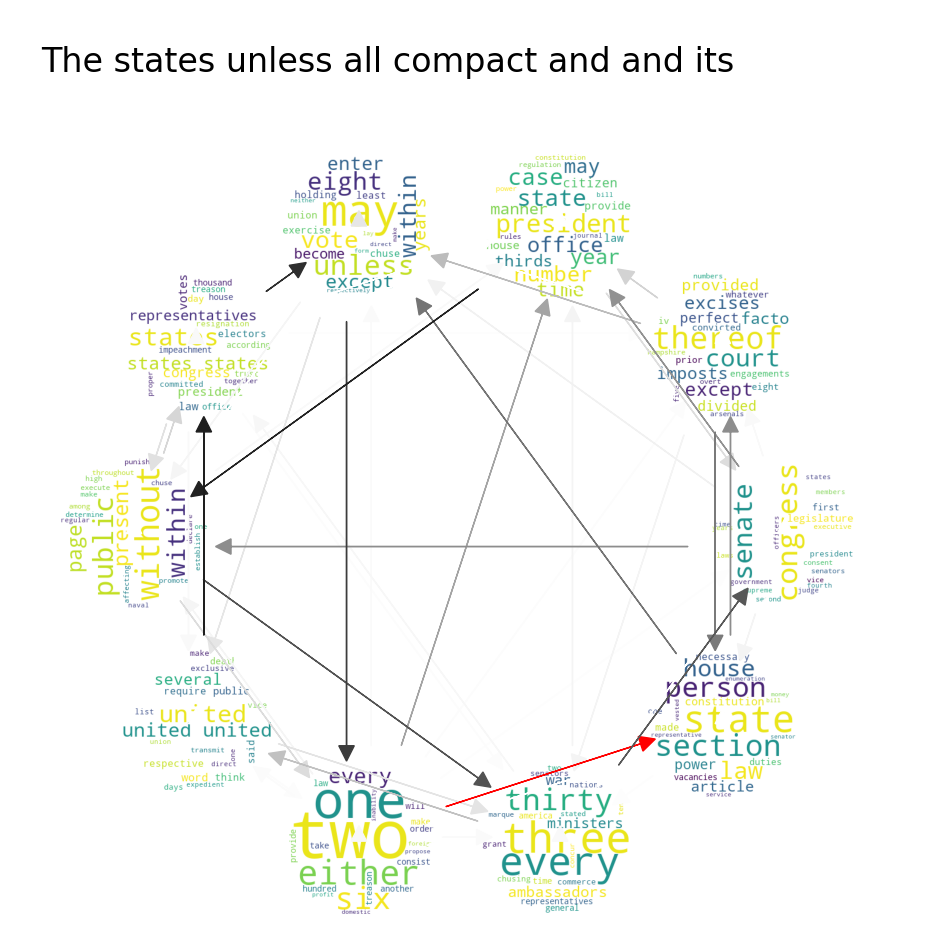

In [ ]:
from IPython.display import HTML
anim = animate_emission(hmm8, obs_map, M=8, seed=123)
HTML(anim.to_html5_video())